In [1]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# setting plots theme
sns.set_theme(style="ticks")

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

# What are the most demanded skills for the top 3 most popular data roles?
#### Methodology
1. Methodology
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage 
4. plot final findings

In [2]:
df_exploded = df.explode(column="job_skills")
job_titles = sorted(df_exploded["job_title_short"].value_counts().head(3).index.to_list())

In [3]:
df_job_skill_count = (
    df_exploded
    .groupby(by=["job_title_short", "job_skills"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)
df_job_skill_count.head()

,job_title_short,job_skills,count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982


In [4]:
df_total = df_exploded['job_title_short'].value_counts().reset_index(name="total")
df_total.head()

,job_title_short,total
0,Data Engineer,1150840
1,Data Scientist,826199
2,Data Analyst,672513
3,Senior Data Engineer,317366
4,Software Engineer,226375


In [5]:
df_percentage_count = df_job_skill_count.merge(right=df_total, how="left", on="job_title_short")

In [6]:
df_percentage_count["count_percentage"] = (df_percentage_count["count"]/df_percentage_count["total"]) * 100

In [7]:
df_percentage_count.head(3)

,job_title_short,job_skills,count,total,count_percentage
0,Data Scientist,python,113711,826199,13.763149
1,Data Engineer,sql,113130,1150840,9.830211
2,Data Engineer,python,108022,1150840,9.386361


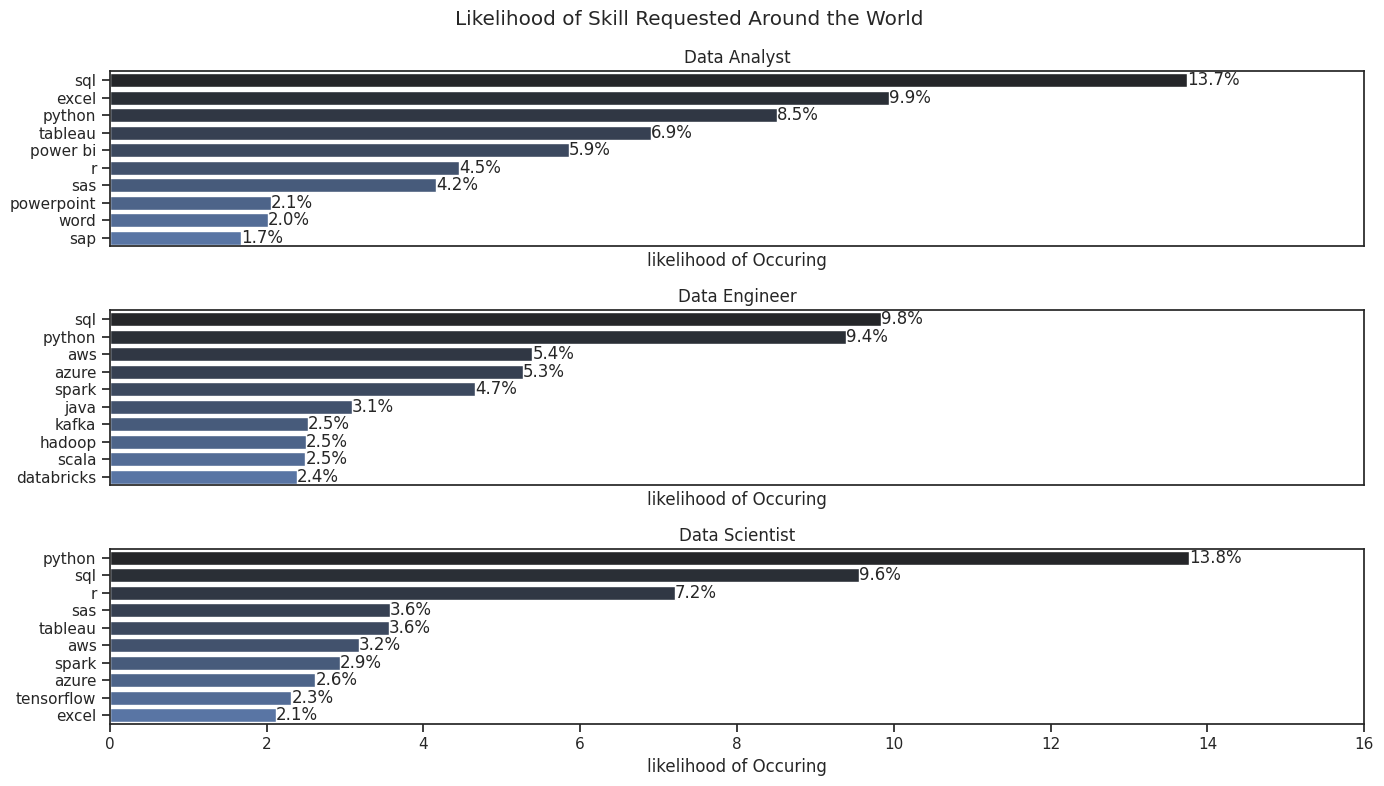

In [10]:
top = 10
fig, ax = plt.subplots(len(job_titles), figsize=(14,8))
for i, title in enumerate(job_titles):
    data = df_percentage_count[df_percentage_count["job_title_short"].isin([title])].sort_values(by="count", ascending=False).head(top)
    sns.barplot(
        data = data,
        x="count_percentage",
        y="job_skills",
        ax=ax[i], 
        palette= "dark:b"
    )
    ax[i].set_title(title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("likelihood of Occuring")
    ax[i].set_xlim(0,16)
    v = data["count_percentage"]
    if i!=2:
        ax[i].set_xticks([])
    for n,(x,y) in enumerate(zip(data["count_percentage"],ax[i].get_yticks())):
        ax[i].text(x,y,f"{list(v)[n]:.01f}%", va="center")
fig.suptitle("Likelihood of Skill Requested Around the World ")
fig.tight_layout()